# Строим классификатор

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv ('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
y = data['class']
print (y.shape, y.dropna().shape)
data = data.drop ('class', axis = 1)

(8124,) (8124,)


### Заметим, что у нас по всем грибам есть информация про то, съедобные они или нет

In [13]:
pd.get_dummies(data['cap-shape'], prefix = 'cap_shape')

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
8119,0,0,0,1,0,0
8120,0,0,0,0,0,1
8121,0,0,1,0,0,0
8122,0,0,0,1,0,0


In [14]:
data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
df_list = [] #Dummies
for name in data.columns:
    df_list.append(pd.get_dummies(data[name], prefix = name))  

In [23]:
df = pd.concat(df_list, axis = 1)

In [24]:
df.head ()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3)

In [31]:
clf = linear_model.RidgeClassifier()
clf.fit(X_train, y_train) #обучение
y_pred = clf.predict(X_test) #Проверяем как оно обучилось

In [67]:
np.sum(y_pred == y_test), y_test.shape

(2436, (2438,))

### Ошиблись всего лишь 2 раза, значит классификатор работает хорошо

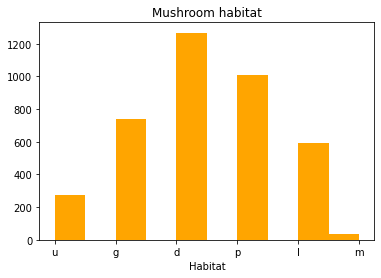

In [52]:
plt.hist(data['habitat'][y == 'p'], color = 'orange')
plt.title('Mushroom habitat')
plt.xlabel('Habitat')
plt.show()

### Можем сделать вывод, что несъедобные грибы чаще всего растут в d

# Ищем наиболее распространенные признаки несъедобных грибов

In [53]:
df[y == 'p']

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
13,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
17,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8116,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8117,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
8118,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [54]:
quality = {}
for name in df.columns:
    quality[name] = np.sum(df[name])

In [56]:
from collections import Counter

In [60]:
counter = Counter(quality)

In [62]:
top_qualities = counter.most_common(10)
top_qualities

[('veil-type_p', 8124),
 ('veil-color_w', 7924),
 ('gill-attachment_f', 7914),
 ('ring-number_o', 7488),
 ('gill-spacing_c', 6812),
 ('gill-size_b', 5612),
 ('stalk-surface-above-ring_s', 5176),
 ('stalk-surface-below-ring_s', 4936),
 ('bruises_f', 4748),
 ('stalk-shape_t', 4608)]

### Получили самые популярные признаки